In [1]:
#1)
library(ISLR2)
#install.packages("caret")
#install.packages("tidyverse")

In [2]:
library(caret)
library(tidyverse)

Loading required package: ggplot2

Loading required package: lattice

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
✔ purrr   0.3.4      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()


In [3]:
college <- data.frame(College)

In [4]:
dim(college)
head(college)

[1] 777  18

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [5]:
#1a)
set.seed(150)

In [6]:
split <- createDataPartition(college$Apps, p = 0.80, list = FALSE)

In [7]:
training <- college[split,]
testing <- college[-split,]

In [8]:
dim(training)
head(training)

[1] 624  18

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63


In [9]:
dim(testing)
head(testing)

[1] 153  18

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52
Alfred University,Yes,1732,1425,472,37,75,1830,110,16548,5406,500,600,82,88,11.3,31,10932,73
Amherst College,Yes,4302,992,418,83,96,1593,5,19760,5300,660,1598,93,98,8.4,63,21424,100


In [10]:
preObj <- preProcess(training, method = c('center', 'scale'))

In [11]:
training <- predict(preObj, training)
testing <- predict(preObj, testing)

In [12]:
dim(training)
head(training)
dim(testing)
head(testing)

[1] 624  18

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,-0.3719438,-0.3366915,-0.07207533,-0.2567024,-0.1848019,-0.1773057,-0.2073199,-0.7593606,-0.9646070,-0.6283248,1.2432435,-0.1670297,-0.1113151,1.0816682,-0.8980323,-0.53309969,-0.3227170
Adelphi University,Yes,-0.2248878,-0.0395000,-0.29312172,-0.6448215,-1.3364638,-0.2177603,0.2294528,0.4487585,1.8970337,1.2530617,0.2345941,-2.6414288,-3.3961514,-0.4572542,-0.5702335,0.17885547,-0.5570106
Adrian College,Yes,-0.4368050,-0.3946697,-0.47926604,-0.3121480,-0.2849464,-0.5476055,-0.4845757,0.1916587,-0.5558012,-0.9418892,-0.2481167,-1.1930001,-0.9325241,-0.2746702,0.5770626,-0.18712951,-0.6741574
Agnes Scott College,Yes,-0.7194544,-0.7159114,-0.68973605,1.7947843,1.6678716,-0.6529477,-0.5073638,0.6184942,0.9885763,-0.6283248,-0.6659857,1.1606967,1.1889326,-1.6310086,1.1507106,1.91258679,-0.3812904
Albertson College,Yes,-0.6719268,-0.6600806,-0.66752564,0.5749814,0.3159206,-0.6193023,-0.5212899,0.7532843,-0.9328110,-0.3147604,-0.9541712,-0.3480833,-0.4534855,-1.1875903,-0.9799820,0.01546932,-0.6155840
Albertus Magnus College,Yes,-0.7373472,-0.7197766,-0.72569574,-0.5893759,-0.5353077,-0.6717731,-0.4016521,0.7008660,1.2338598,-0.3147604,0.2345941,1.0399943,0.9151963,-0.6398383,0.2492637,-0.16139619,-0.1469967


[1] 153  18

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alaska Pacific University,Yes,-0.7820790,-0.8030933,-0.7764624,-0.6448215,-0.5853800,-0.7052183,0.002837359,-0.729407256,-0.21967198,1.5666261,0.2345941,0.1950775,-0.5219196,-0.53550453,-1.717529502,0.2595274,-2.9585205
Albion College,Yes,-0.3051256,-0.1271114,-0.3174474,0.5195358,0.6163542,-0.4358547,-0.526986918,0.845141332,0.42169893,-0.6283248,-0.7020089,0.9796431,1.3942349,-0.06600278,1.150710621,0.3749189,0.4387374
Albright College,Yes,-0.5458389,-0.5054723,-0.5945486,0.1314167,0.3659929,-0.5602225,-0.353543845,1.276220186,0.03469608,-1.5690180,-1.2063335,0.3761311,0.2992895,-0.69200511,0.003414572,0.4069834,0.8487513
Alderson-Broaddus College,Yes,-0.6733247,-0.6519207,-0.6527187,-0.3675936,-0.5853800,-0.5950696,-0.497868738,-0.003537361,-0.89193045,0.6886457,0.6668724,-1.9775657,-2.6433764,-0.63983825,-0.652183171,-0.1348459,-0.7913043
Alfred University,Yes,-0.3518145,-0.2538043,-0.3354272,0.5195358,0.9668600,-0.3885909,-0.477612613,1.514099832,0.94860422,-0.3147604,-1.0622408,0.5571847,0.5730258,-0.69200511,0.659012314,0.2615697,0.4387374
Amherst College,Yes,0.3666910,-0.4397638,-0.3925397,3.0700328,2.0183773,-0.4360549,-0.544078024,2.315851586,0.85230773,0.6886457,0.3758050,1.2210479,1.2573667,-1.44842459,3.281403283,2.4043791,2.0202195


In [13]:
y_train <- training$Apps
y_test <- testing$Apps
head(y_train,10)
head(y_test)

[1] -0.37194380 -0.22488781 -0.43680499 -0.71945443 -0.67192683 -0.73734717
 [7] -0.09460627 -0.50641895 -0.48181643 -0.69792722

[1] -0.7820790 -0.3051256 -0.5458389 -0.6733247 -0.3518145  0.3666910

In [14]:
one_hot_encoding <- dummyVars(Apps ~ ., data = training)
one_hot_encoding

Dummy Variable Object

Formula: Apps ~ .
18 variables, 1 factors
Variables and levels will be separated by '.'
A less than full rank encoding is used

In [15]:
x_train <- predict(one_hot_encoding, training)
x_test <- predict(one_hot_encoding, testing)

In [16]:
head(x_train)
head(x_test)

,Private.No,Private.Yes,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,0,1,-0.3366915,-0.07207533,-0.2567024,-0.1848019,-0.1773057,-0.2073199,-0.7593606,-0.9646070,-0.6283248,1.2432435,-0.1670297,-0.1113151,1.0816682,-0.8980323,-0.53309969,-0.3227170
Adelphi University,0,1,-0.0395000,-0.29312172,-0.6448215,-1.3364638,-0.2177603,0.2294528,0.4487585,1.8970337,1.2530617,0.2345941,-2.6414288,-3.3961514,-0.4572542,-0.5702335,0.17885547,-0.5570106
Adrian College,0,1,-0.3946697,-0.47926604,-0.3121480,-0.2849464,-0.5476055,-0.4845757,0.1916587,-0.5558012,-0.9418892,-0.2481167,-1.1930001,-0.9325241,-0.2746702,0.5770626,-0.18712951,-0.6741574
Agnes Scott College,0,1,-0.7159114,-0.68973605,1.7947843,1.6678716,-0.6529477,-0.5073638,0.6184942,0.9885763,-0.6283248,-0.6659857,1.1606967,1.1889326,-1.6310086,1.1507106,1.91258679,-0.3812904
Albertson College,0,1,-0.6600806,-0.66752564,0.5749814,0.3159206,-0.6193023,-0.5212899,0.7532843,-0.9328110,-0.3147604,-0.9541712,-0.3480833,-0.4534855,-1.1875903,-0.9799820,0.01546932,-0.6155840
Albertus Magnus College,0,1,-0.7197766,-0.72569574,-0.5893759,-0.5353077,-0.6717731,-0.4016521,0.7008660,1.2338598,-0.3147604,0.2345941,1.0399943,0.9151963,-0.6398383,0.2492637,-0.16139619,-0.1469967


,Private.No,Private.Yes,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Alaska Pacific University,0,1,-0.8030933,-0.7764624,-0.6448215,-0.5853800,-0.7052183,0.002837359,-0.729407256,-0.21967198,1.5666261,0.2345941,0.1950775,-0.5219196,-0.53550453,-1.717529502,0.2595274,-2.9585205
Albion College,0,1,-0.1271114,-0.3174474,0.5195358,0.6163542,-0.4358547,-0.526986918,0.845141332,0.42169893,-0.6283248,-0.7020089,0.9796431,1.3942349,-0.06600278,1.150710621,0.3749189,0.4387374
Albright College,0,1,-0.5054723,-0.5945486,0.1314167,0.3659929,-0.5602225,-0.353543845,1.276220186,0.03469608,-1.5690180,-1.2063335,0.3761311,0.2992895,-0.69200511,0.003414572,0.4069834,0.8487513
Alderson-Broaddus College,0,1,-0.6519207,-0.6527187,-0.3675936,-0.5853800,-0.5950696,-0.497868738,-0.003537361,-0.89193045,0.6886457,0.6668724,-1.9775657,-2.6433764,-0.63983825,-0.652183171,-0.1348459,-0.7913043
Alfred University,0,1,-0.2538043,-0.3354272,0.5195358,0.9668600,-0.3885909,-0.477612613,1.514099832,0.94860422,-0.3147604,-1.0622408,0.5571847,0.5730258,-0.69200511,0.659012314,0.2615697,0.4387374
Amherst College,0,1,-0.4397638,-0.3925397,3.0700328,2.0183773,-0.4360549,-0.544078024,2.315851586,0.85230773,0.6886457,0.3758050,1.2210479,1.2573667,-1.44842459,3.281403283,2.4043791,2.0202195


In [17]:
linear <- lm(Apps ~ ., data = training)

In [18]:
pred <- predict(linear, testing)

In [19]:
(lin_info <- postResample(pred, testing$Apps))

RMSE  Rsquared       MAE 
0.4028947 0.9319650 0.1805774

In [20]:
#1b) Fit a ridge regression model on the training set, with λ chosen by crossvalidation. Report the test error obtained.
install.packages("glmnet")


The downloaded binary packages are in
	/var/folders/_3/nbf8r53d0f19nygyl0lz56p40000gn/T//RtmpFmfFhu/downloaded_packages


In [21]:
ridge_fit <- train(x = x_train, y = y_train,
                   method = 'glmnet', 
                   trControl = trainControl(method = 'cv', number = 10),
                   tuneGrid = expand.grid(alpha = 0,
                                          lambda = seq(0, 10e2, length.out = 20)))

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


In [22]:
(ridge_info <- postResample(predict(ridge_fit, x_test), y_test))


RMSE  Rsquared       MAE 
0.5650812 0.8757608 0.2138779

In [23]:
coef(ridge_fit$finalModel, ridge_fit$bestTune$lambda)

19 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept)  0.046005573
Private.No   0.097697074
Private.Yes -0.098948653
Accept       0.487898570
Enroll       0.176964057
Top10perc    0.123976538
Top25perc   -0.010483059
F.Undergrad  0.160459713
P.Undergrad  0.007472502
Outstate    -0.002985068
Room.Board   0.060344444
Books       -0.006453713
Personal    -0.002030226
PhD         -0.017548838
Terminal    -0.020730833
S.F.Ratio    0.009278258
perc.alumni -0.042180830
Expend       0.139312717
Grad.Rate    0.054596200

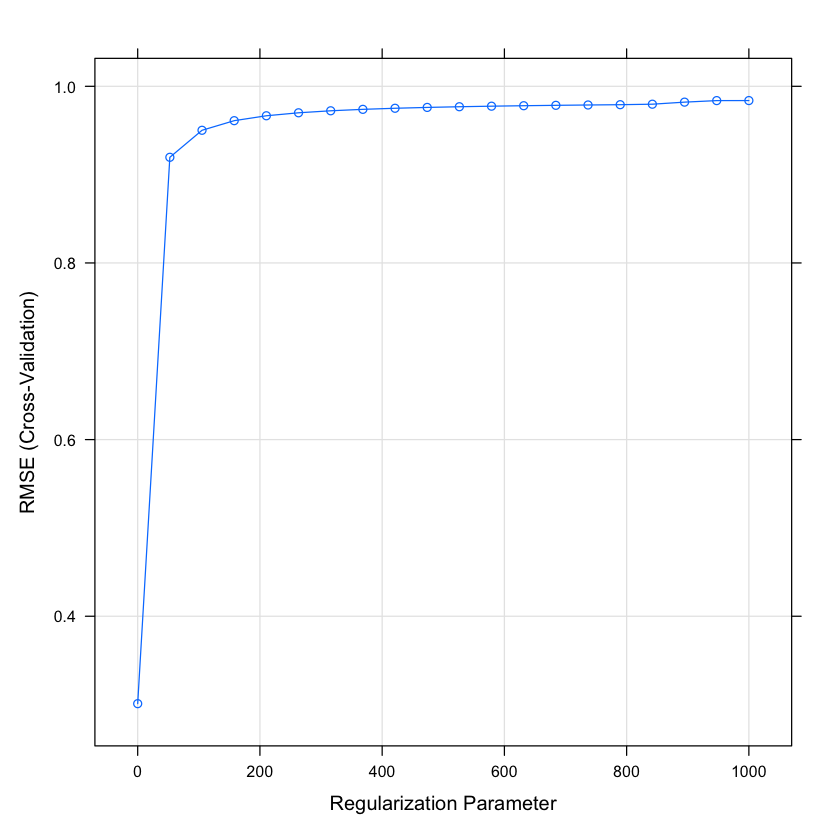

In [24]:
plot(ridge_fit)

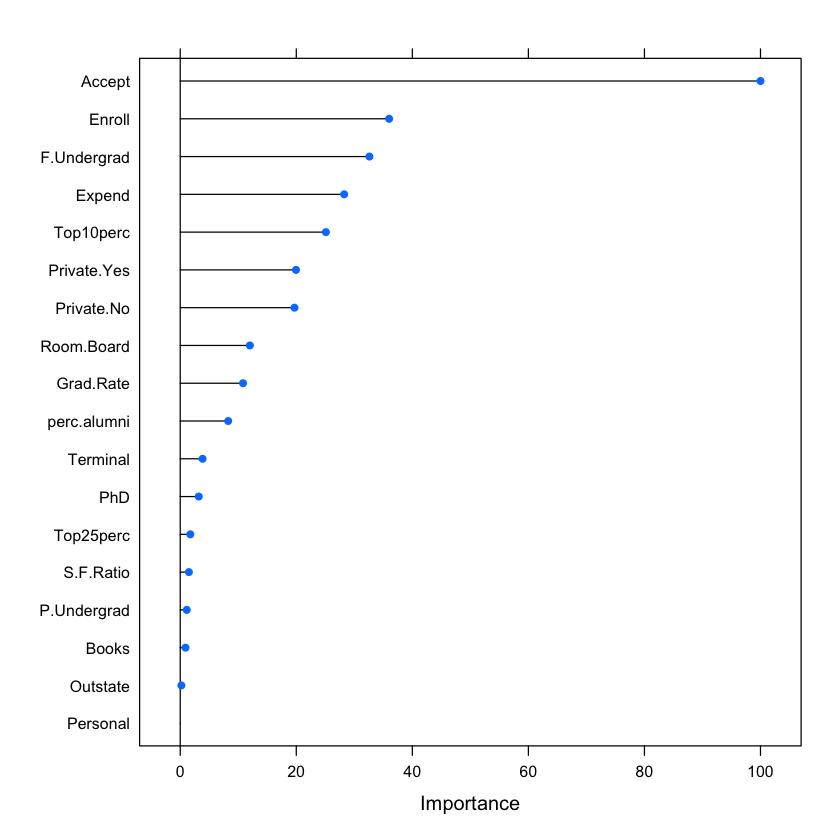

In [25]:
plot(varImp(ridge_fit))

In [26]:
#1d) Fit a lasso model on the training set, with λ chosen by cross-validation.Report the test error obtained, along with the number of non-zero coefficient estimates
lasso_fit <- train(x = x_train, y = y_train, 
                   method = 'glmnet',
                   trControl = trainControl(method = 'cv', number = 10),
                   tuneGrid = expand.grid(alpha = 1,
                                          lambda = seq(0.0001, 1, length.out = 50)))


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


In [27]:
(lasso_info <- postResample(predict(lasso_fit, x_test), y_test))

RMSE  Rsquared       MAE 
0.4065043 0.9310496 0.1799253

In [28]:
coef(lasso_fit$finalModel, lasso_fit$bestTune$lambda)

19 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept) -0.044387922
Private.No   0.164869423
Private.Yes  .          
Accept       0.785572931
Enroll      -0.045311207
Top10perc    0.226282851
Top25perc   -0.080824851
F.Undergrad  0.121682833
P.Undergrad  0.009177170
Outstate    -0.063317593
Room.Board   0.053831768
Books       -0.009221606
Personal     0.001319891
PhD         -0.035614622
Terminal    -0.022192633
S.F.Ratio    0.019178626
perc.alumni -0.020141380
Expend       0.149987968
Grad.Rate    0.044427513

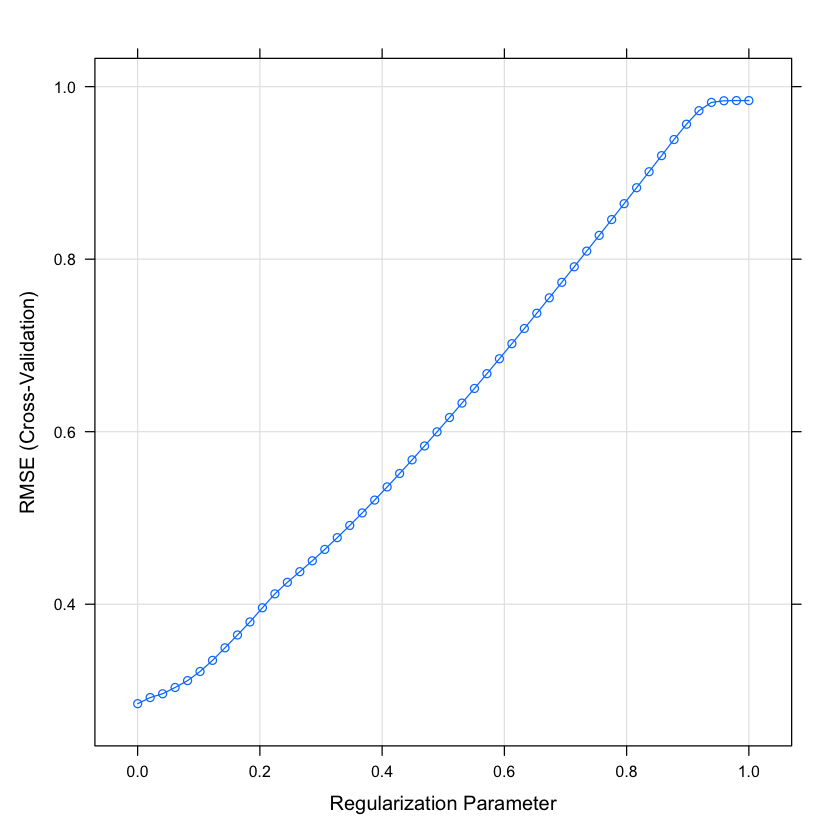

In [29]:
plot(lasso_fit)

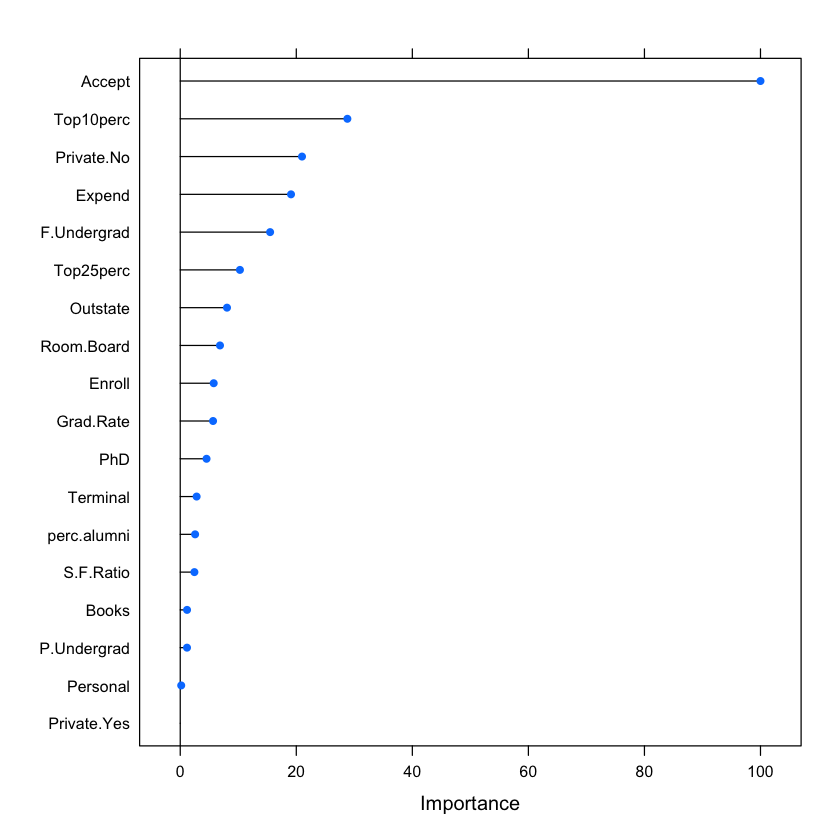

In [30]:
plot(varImp(lasso_fit))

In [31]:
#1g) Comment more generally on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these three approaches?
as_tibble(rbind(lin_info,
      ridge_info,
      lasso_info)) %>%
    mutate(model = c('Linear', 'Ridge', 'Lasso')) %>%
    select(model, RMSE, Rsquared)

model,RMSE,Rsquared
<chr>,<dbl>,<dbl>
Linear,0.4028947,0.9319650
Ridge,0.5650812,0.8757608
Lasso,0.4065043,0.9310496


In [32]:
testing %>%
    summarize(sd = sd(Apps))

sd
<dbl>
1.370421


The ridge regression model performed slightly better than the other two models. The RMSE > 21 and Rsqaured > 94 for linear and lasso regression models, but if observed the RMSE value of Ridge regression model is slightly lesser than the other two models and Rsquared is slightly higher than linear and lasso models. When we compare the RMSE scores with the mean and standard deviation of the response variable we see that the models all have phenomenal accuracy! 